In [47]:
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [48]:
dataset = pd.read_csv('Public Service/DKI Jakarta/Transportasi/agustus-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv')

In [49]:
print(dataset.shape)

(82, 9)


In [50]:
data = dataset.drop(['waktu', 'arah', 'koridor', 'target_kecepatan'],axis=1)
data

,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,19.62,56.06,22.77,24.36,58.82
1,13.36,38.17,24.14,24.36,36.88
2,11.13,31.80,29.64,24.36,25.99
3,16.25,46.43,25.82,24.36,44.35
4,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...
77,20.29,57.97,21.01,23.46,58.78
78,14.47,41.34,20.41,20.25,45.81
79,15.55,44.43,17.41,20.25,56.99
80,17.43,49.80,22.10,20.25,54.92


           jarak  target_waktu_tempuh  pencapaian_kecepatan_per_koridor  \
count  82.000000            82.000000                         82.000000   
mean   15.028780            42.939268                         25.857195   
std     3.056263             8.732337                          5.091508   
min     8.450000            24.140000                         15.520000   
25%    13.130000            37.510000                         22.432500   
50%    14.670000            41.910000                         25.385000   
75%    17.050000            48.710000                         28.680000   
max    21.210000            60.600000                         39.680000   

       pencapaian_kecepatan  pencapaian_waktu_tempuh  
count             82.000000                82.000000  
mean              25.858902                40.727073  
std                3.822739                12.144601  
min               20.220000                14.210000  
25%               23.240000                30.987

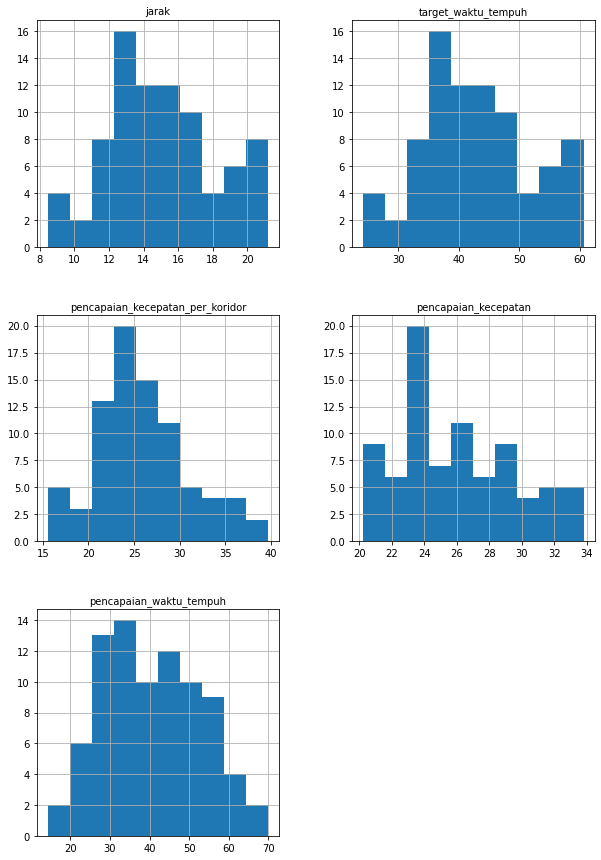

In [51]:
print(data.describe())
fig = data.hist(xlabelsize= 10, ylabelsize=10, figsize=(10,15))
[x.title.set_size(10) for x in fig.ravel()]
pyplot.show()

In [52]:
new_data = data.values[:, :-1]
# separate into input and output columns
X, y = new_data[:, :4], new_data[:, [-1]]
# define and configure the model
model = RandomForestRegressor()
# evaluate the model
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.366)


In [53]:
# normalisasi

               0          1          2          3          4
count  82.000000  82.000000  82.000000  82.000000  82.000000
mean    0.515578   0.515614   0.427864   0.415236   0.475046
std     0.239519   0.239505   0.210741   0.281498   0.217567
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.366771   0.366703   0.286113   0.222386   0.300564
50%     0.487461   0.487383   0.408320   0.304860   0.459154
75%     0.673981   0.673889   0.544702   0.632548   0.653260
max     1.000000   1.000000   1.000000   1.000000   1.000000


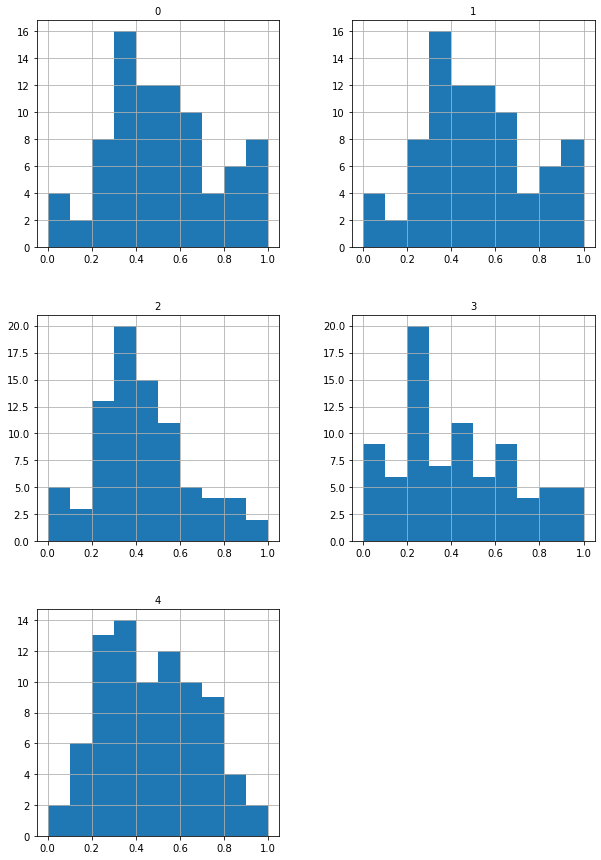

In [54]:
trans = MinMaxScaler()
new_data_1 = trans.fit_transform(data)
# convert the array back to a dataframe
dataset_1 = pd.DataFrame(new_data_1)
# summarize
print(dataset_1.describe())
# histograms of the variables
fig = dataset_1.hist(xlabelsize= 10, ylabelsize=10, figsize=(10,15))
[x.title.set_size(10) for x in fig.ravel()]
# show the plot
pyplot.show()

In [55]:
new_dataset = dataset_1.values[:, :-1]
# separate into input and output columns
X_1, y_1 = new_dataset[:, :4], new_dataset[:, [-1]]
# define and configure the model
model = RandomForestRegressor()
# evaluate the model
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X_1, y_1, scoring='r2', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.831 (0.339)


In [56]:
#standarisasi

                  0             1             2             3             4
count  8.200000e+01  8.200000e+01  8.200000e+01  8.200000e+01  8.200000e+01
mean  -6.783192e-16 -6.194232e-16  3.208815e-16 -1.028987e-15  5.415722e-17
std    1.006154e+00  1.006154e+00  1.006154e+00  1.006154e+00  1.006154e+00
min   -2.165804e+00 -2.166082e+00 -2.042776e+00 -1.484172e+00 -2.196882e+00
25%   -6.250986e-01 -6.255690e-01 -6.767681e-01 -6.893013e-01 -8.069025e-01
50%   -1.181143e-01 -1.185939e-01 -9.331243e-02 -3.945147e-01 -7.349209e-02
75%    6.654068e-01  6.649130e-01  5.578261e-01  7.767358e-01  8.241642e-01
max    2.034923e+00  2.034898e+00  2.731582e+00  2.090116e+00  2.427684e+00


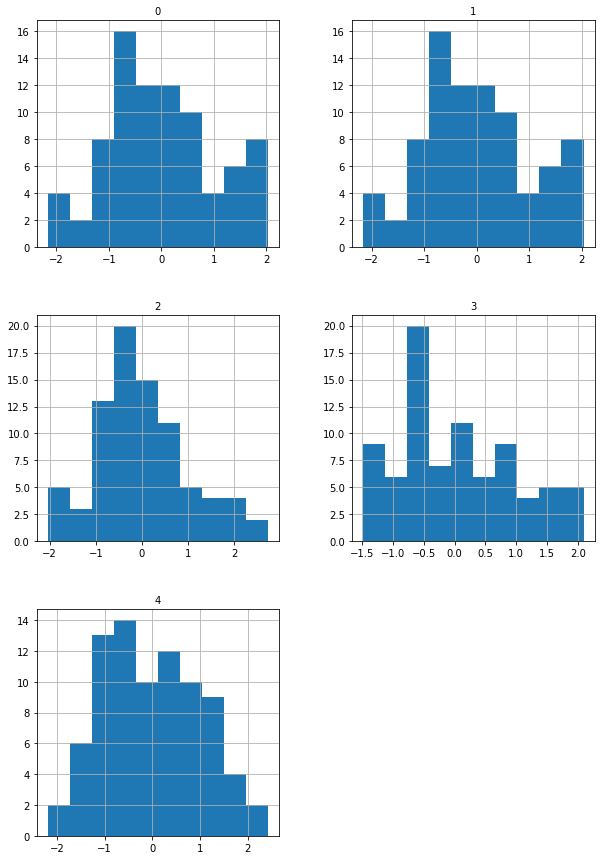

In [57]:
trans = StandardScaler()
new_data_2 = trans.fit_transform(data)
# convert the array back to a dataframe
dataset_2 = pd.DataFrame(new_data_2)
# summarize
print(dataset_2.describe())
# histograms of the variables
fig = dataset_2.hist(xlabelsize= 10, ylabelsize=10, figsize=(10,15))
[x.title.set_size(10) for x in fig.ravel()]
# show the plot
pyplot.show()

In [58]:
new_dataset_1 = dataset_2.values[:, :-1]
# separate into input and output columns
X_2, y_2 = new_dataset_1[:, :4], new_dataset_1[:, [-1]]
# define and configure the model
model = RandomForestRegressor()
# evaluate the model
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X_2, y_2, scoring='r2', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.339)


In [59]:
#robust scaler

               0          1             2          3             4
count  82.000000  82.000000  8.200000e+01  82.000000  8.200000e+01
mean    0.091526   0.091899  7.558145e-02   0.269103  4.505768e-02
std     0.779659   0.779673  8.149672e-01   0.686309  6.168686e-01
min    -1.586735  -1.586607 -1.579032e+00  -0.743268 -1.301841e+00
25%    -0.392857  -0.392857 -4.725890e-01  -0.201077 -4.496508e-01
50%     0.000000   0.000000  2.844947e-16   0.000000 -1.804112e-16
75%     0.607143   0.607143  5.274110e-01   0.798923  5.503492e-01
max     1.668367   1.668750  2.288115e+00   1.694794  1.533460e+00


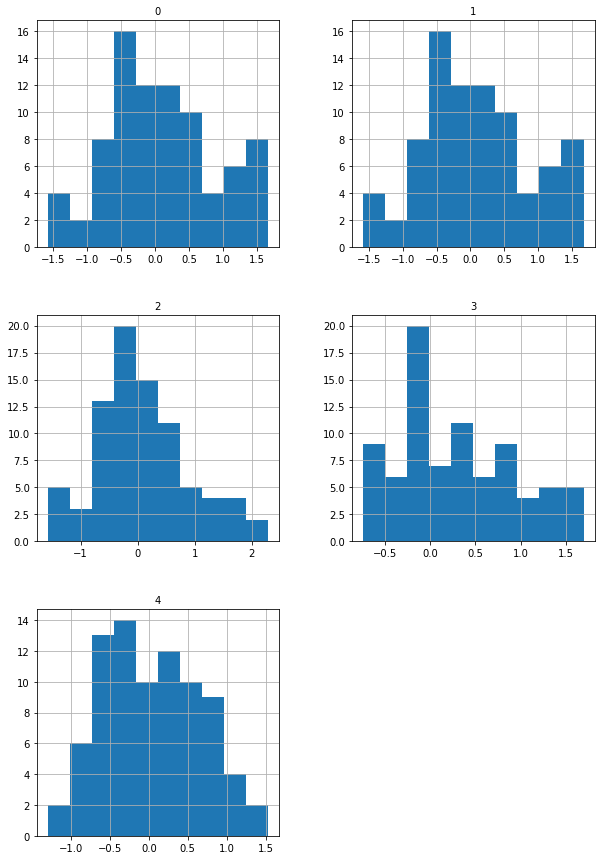

In [60]:
trans = RobustScaler()
new_data_3 = trans.fit_transform(data)
# convert the array back to a dataframe
dataset_3 = pd.DataFrame(new_data_3)
# summarize
print(dataset_3.describe())
# histograms of the variables
fig = dataset_3.hist(xlabelsize= 10, ylabelsize=10, figsize=(10,15))
[x.title.set_size(10) for x in fig.ravel()]
# show the plot
pyplot.show()

In [61]:
new_dataset_2 = dataset_3.values[:, :-1]
# separate into input and output columns
X_3, y_3 = new_dataset_2[:, :4], new_dataset_2[:, [-1]]
# define and configure the model
model = RandomForestRegressor()
# evaluate the model
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X_3, y_3, scoring='r2', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.810 (0.365)
